In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

feature = pd.DataFrame(iris['data'],columns = iris['feature_names'])
target = pd.DataFrame(iris['target'],columns = ['class'])

data = pd.concat([feature,target],axis = 1)
df = data[data['class'] !=2]

In [ ]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [ ]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                  int64
dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


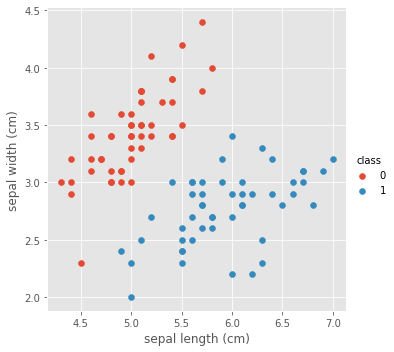

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
g = sns.FacetGrid(df ,hue="class", size=5)
g.map(plt.scatter,"sepal length (cm)","sepal width (cm)")
g.add_legend()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,:2].values
y = df.iloc[:,4].values

sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

In [ ]:
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

lr = LogisticRegression(C=100.0,random_state=1)
lr.fit(X_std,y)

print(lr.coef_)
print(lr.intercept_) 

[[ 9.97519721 -6.71009506]]
[1.81731713]


In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    markers =('s','x','o','^','v')
    colors =('red','blue','lightgreen','gray','cyan')
    cmap= ListedColormap(colors[:len(np.unique(y))])

    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1, xx2= np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1. ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],
                    y=X[y == cl,1],
                    alpha=0.8,
                    c=colors [idx],
                    marker=markers [idx],
                    label=cl,
                    edgecolor='black')
    if test_idx:    
        X_test , y_test = X[test_idx,:],y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='0',
                    s=100,
                    label='test set')

In [ ]:
plot_decision_regions(X_std,y,classifier=lr)
plt.xlabel('petal Length [standardized')
plt.ylabel('petal width [standardized')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show

In [ ]:
theta_0 = lr.intercept_ 
theta_1 = lr.coef_[0][0]
theta_2 = lr.coef_[0][1]

t = np.linspace(-3,3,2000)
plt.plot(X_std[y==1,0],X_std[y==1,1],'o')
plt.plot(X_std[y==2,0],X_std[y==2,1],'x')
plt.plot(t,-(theta_0+theta_1*t)/theta_2)
plt.xlabel('petal Length [standardized')
plt.ylabel('petal width [standardized')
plt.tight_layout()

plt.show()